In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import cv2
import os

In [ ]:
Images = []
Labels = []
path = "/content/drive/MyDrive/Resized Data"
DatasetFolders = os.listdir(path)
MainFolder = os.getcwd()
for SubFolders in DatasetFolders:
    os.chdir(path)
    if SubFolders == "Negative Data":  
        os.chdir(SubFolders)
        for img in glob.glob(os.getcwd() + "/*.JPG"):
            Labels.append("Negative")
            img = cv2.imread(img,cv2.IMREAD_COLOR)
            Images.append(np.array(img))
        os.chdir(MainFolder)
    else:
        os.chdir(SubFolders)
        for img in glob.glob(os.getcwd() + "/*.JPG"):
            Labels.append("Positive")
            img = cv2.imread(img,cv2.IMREAD_COLOR)
            Images.append(np.array(img))
        os.chdir(MainFolder)

In [ ]:
print("Labels Vector:",Labels)

Labels Vector: ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 

In [ ]:
le=LabelEncoder()
Labels=le.fit_transform(Labels)

In [ ]:
Images = np.array(Images)

In [ ]:
print("Label Vector:",Labels)
print("Length of Labels Vector:",len(Labels))
print("Shape of Images",Images.shape)
print("Number of Images:",Images.shape)
print("Size of Images: ({},{},{})".format(Images.shape[1],Images.shape[2],Images.shape[3]))

Label Vector: [1 1 1 ... 0 0 0]
Length of Labels Vector: 3777
Shape of Images (3777, 200, 200, 3)
Number of Images: (3777, 200, 200, 3)
Size of Images: (200,200,3)


In [ ]:
TrainImages , TestImages, TrainLabels, TestLabels = train_test_split(Images, Labels, test_size = 0.2, random_state = 2)
TrainImages , ValidationImages, TrainLabels, ValidationLabels = train_test_split(TrainImages, TrainLabels, test_size = 0.25, random_state = 2)

In [ ]:
print("Shape of Train Imgaes is:",TrainImages.shape)
print("Shape of Test Imgaes is:",TestImages.shape)
print("Shape of Validation Imgaes is:",ValidationImages.shape)
print("Length of Train Label Vector is:",len(TrainLabels))
print("Length of Test Label Vector is:",len(TestLabels))
print("Length of Validation Label Vector is:",len(ValidationLabels))

Shape of Train Imgaes is: (2265, 200, 200, 3)
Shape of Test Imgaes is: (756, 200, 200, 3)
Shape of Validation Imgaes is: (756, 200, 200, 3)
Length of Train Label Vector is: 2265
Length of Test Label Vector is: 756
Length of Validation Label Vector is: 756


In [ ]:
dataGen = ImageDataGenerator(shear_range = 0.2,
                             zoom_range = 0.1,
                             validation_split=0.2)
dataGen.fit(TrainImages)

In [ ]:
BatchSize = 16
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(200,200,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

history = model.fit(dataGen.flow(TrainImages, TrainLabels, batch_size = BatchSize), 
                                           validation_data = (ValidationImages, ValidationLabels), epochs = 200,
                                           steps_per_epoch = TrainImages.shape[0]//BatchSize, shuffle =1)

Epoch 1/200
141/141 [==============================] - 64s 140ms/step - loss: 14.2157 - accuracy: 0.6315 - val_loss: 0.6660 - val_accuracy: 0.7817
Epoch 2/200
141/141 [==============================] - 18s 126ms/step - loss: 0.5876 - accuracy: 0.7157 - val_loss: 0.5769 - val_accuracy: 0.7354
Epoch 3/200
141/141 [==============================] - 18s 126ms/step - loss: 0.5456 - accuracy: 0.7466 - val_loss: 0.5714 - val_accuracy: 0.8214
Epoch 4/200
141/141 [==============================] - 18s 127ms/step - loss: 0.5278 - accuracy: 0.7639 - val_loss: 0.5664 - val_accuracy: 0.7394
Epoch 5/200
141/141 [==============================] - 18s 126ms/step - loss: 0.5013 - accuracy: 0.7855 - val_loss: 0.5335 - val_accuracy: 0.7791
Epoch 6/200
141/141 [==============================] - 18s 126ms/step - loss: 0.4676 - accuracy: 0.8032 - val_loss: 0.4841 - val_accuracy: 0.7844
Epoch 7/200
141/141 [==============================] - 18s 126ms/step - loss: 0.4978 - accuracy: 0.7813 - val_loss: 0.4794 

In [ ]:
TrainScore = model.evaluate(TrainImages,TrainLabels)
print("Loss of Training: %{}".format(TrainScore[0]*100))
print("Accuracy of Training: %{}".format(TrainScore[1]*100))

71/71 [==============================] - 1s 17ms/step - loss: 0.0666 - accuracy: 0.9784
Loss of Training: %6.6573843359947205
Accuracy of Training: %97.83664345741272


In [ ]:
ValidationScore = model.evaluate(ValidationImages,ValidationLabels)
print("Loss of Validation: %{}".format(ValidationScore[0]*100))
print("Accuracy of Validation: %{}".format(ValidationScore[1]*100))

24/24 [==============================] - 0s 12ms/step - loss: 0.2076 - accuracy: 0.9365
Loss of Validation: %20.762577652931213
Accuracy of Validation: %93.65079402923584


In [ ]:
TestScore = model.evaluate(TestImages,TestLabels)
print("Loss of Test: %{}".format(TestScore[0]*100))
print("Accuracy of Test: %{}".format(TestScore[1]*100))

24/24 [==============================] - 0s 13ms/step - loss: 0.2934 - accuracy: 0.9167
Loss of Test: %29.34255301952362
Accuracy of Test: %91.66666865348816


(<matplotlib.legend.Legend at 0x7f3db3010a50>, (0.5, 1.0), None)

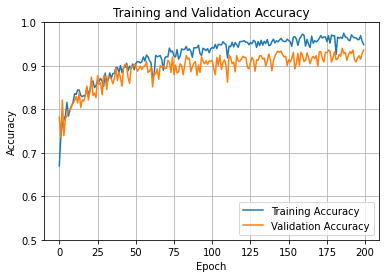

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy'), plt.ylabel('Accuracy'), plt.xlabel('Epoch')
plt.legend(loc='lower right'), plt.ylim([0.5, 1]), plt.grid()
plt.savefig("/content/drive/MyDrive/PHOTOS/EightCodeWithTestAndValidationMatrix/ValidationTrainingAccuracy.png")

(<matplotlib.legend.Legend at 0x7f3db30add90>, (0.0, 3.0), None)

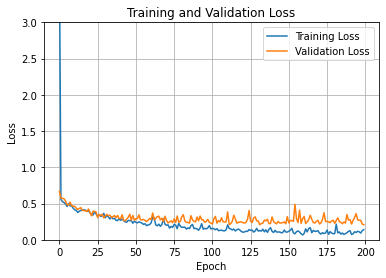

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch'), plt.ylabel('Loss'), plt.title('Training and Validation Loss')
plt.legend(loc='upper right'), plt.ylim([0, 3]), plt.grid()
plt.savefig("/content/drive/MyDrive/PHOTOS/EightCodeWithTestAndValidationMatrix/ValidationTrainingLoss.png")

In [ ]:
PredictionTestLabels = model.predict(TestImages)
PredictionTestLabels=np.round(PredictionTestLabels)
ConfusionTestMatrix = confusion_matrix(TestLabels, PredictionTestLabels)
print("Confusion matrix : \n",ConfusionTestMatrix)

TN, FP, FN, TP = confusion_matrix(TestLabels, PredictionTestLabels).ravel()
print('\nTrue Positive : {}\nFalse Negative: {}\nFalse Positive: {}\nTrue Negative: {}'.format(TP, FN, FP, TN))

TestPrecisionValue = TP / (TP+FP)
TestRecallValue = TP / (TP+FN)
TestAccurayValue = (TP + TN) /(TP + FN + FP + TN)
TestF1Score =   2 * (TestPrecisionValue * TestRecallValue) / (TestPrecisionValue + TestRecallValue)
print("\nPresicion: %{:.2f}\nRecall: %{:.2f}\nAccuracy: %{:.2f}\nF1-Score: %{:.2f}".format(TestPrecisionValue*100,TestRecallValue*100,TestAccurayValue*100,TestF1Score*100))

TestTable = classification_report(TestLabels,PredictionTestLabels,labels=[1,0])
print("Classification report : \n\n",TestTable)

Confusion matrix : 
 [[518  14]
 [ 49 175]]

True Positive : 175
False Negative: 49
False Positive: 14
True Negative: 518

Presicion: %92.59
Recall: %78.12
Accuracy: %91.67
F1-Score: %84.75
Classification report : 

               precision    recall  f1-score   support

           1       0.93      0.78      0.85       224
           0       0.91      0.97      0.94       532

    accuracy                           0.92       756
   macro avg       0.92      0.88      0.90       756
weighted avg       0.92      0.92      0.91       756

